# **What's your EDA? | Exploratory Data Analysis II**

---



In this part of the workshop, we’ll move beyond cleaning and focus on making our dataset fair and insightful. First, we’ll look at balancing techniques to handle situations where one group dominates the data, preventing biased analysis. Next, we’ll explore different levels of analysis—from simple one-variable summaries to comparing relationships between two or more variables using visualizations.

NOTE: Please do not run all the cells at once! You can run the cell importing basic libraries & dataset first. Thereafter, we will go through the code together.

# **Importing Basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Import Dataset**

In [ ]:
# ensure u have uploaded the file onto google colab already
df = pd.read_csv("employee_cleaned.csv")

# Inspect top 5 rows of data
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0.0,0
1,Bachelors,2013,Pune,1,28,Female,No,3.0,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2.0,0
3,Masters,2016,Bangalore,3,27,Male,No,5.0,1
4,Masters,2017,Pune,3,29,Male,Yes,2.0,1


# **Checking imbalances**

In EDA, we typically will check for any imbalances and then report them in bar charts. Balancing will be more for data preprocessing in Machine Learning.

We will start of by identifying if `EverBenched` is imbalanced.

In [ ]:
# getting counts for 'Yes' and 'No'
everbenched_counts = df['EverBenched'].value_counts()
print(everbenched_counts)

# to get percentages + formatting ur output
no_percent = round((everbenched_counts['No'] / len(df)) * 100, 2)
# len(): length of dataframe (ie. no. of rows)
# round() is to round off your result
print("\nPercentage of employees who were never benched:", no_percent)

yes_percent = round((everbenched_counts['Yes'] / len(df)) * 100, 2)
print("\nPercentage of employees who were benched:", yes_percent)

EverBenched
No     2726
Yes     383
Name: count, dtype: int64

Percentage of employees who were never benched: 87.68

Percentage of employees who were benched: 12.32


In [ ]:
# alternative code!
# this works the same as the previous cell but it is a lot shorter

# getting both counts & percentage in one line of code
percentage = df['EverBenched'].value_counts(normalize=True) * 100
# normalize = True: gives the relative frequencies of the unique values
#                   (in terms of percentages or proportions rather than just the raw numbers)
percentage

,proportion
EverBenched,
No,87.680926
Yes,12.319074


From the result we see that % of employees who were never benched is over 80% & % of employees who were not benched is ~10%. Following the general rule of thumb, this variable is imbalanced.

We can report this imbalance in a simple bar chart. (Akshata will be explaining more on visualisations in part 3 of our workshop! For now, I will just show you how we report these imbalances.)

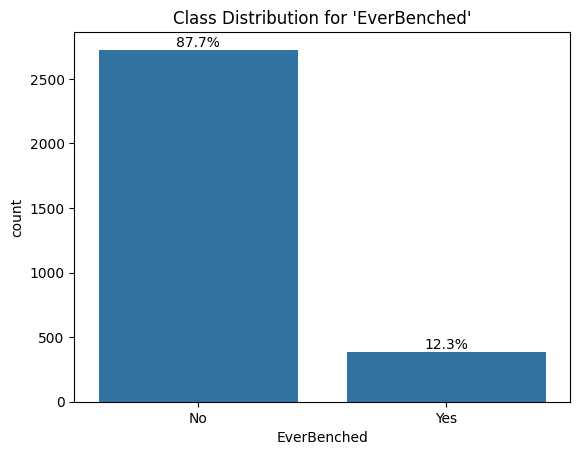

In [ ]:
# reporting the imbalance for 'EverBenched'
ax = sns.countplot(x='EverBenched', data=df)
plt.title("Class Distribution for 'EverBenched'")

# add percentage labels on bars
for p in ax.patches:
    count = p.get_height()
    percent = 100 * count / len(df)
    ax.annotate(f'{percent:.1f}%',              # format with 1 dp
                (p.get_x() + p.get_width() / 2., count),  # position
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()

# **Analysis**

## **Univariate Analysis**

*   Only 1 dependent variable
*   To derive the data, define and summarize it, and analyze the pattern present in it
*   Numerical:
    * Central tendency: mean, median, mode.
    * Dispersion: variance, standard deviation, quartiles.
    * Visualization: histograms, boxplots etc.
*   Categorical:
    * Frequency counts, proportions.
    * Visualization: bar charts, pie charts

**Numerical Univariate Analysis**

In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000
mean,2015.099067,2.653586,30.669990,2.687038,0.385976
std,1.883810,0.608264,4.923005,1.593149,0.486903
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,2.000000,0.000000
50%,2015.000000,3.000000,30.000000,3.000000,0.000000
75%,2017.000000,3.000000,34.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Simple boxplot to show distribution of 'Joining Year'

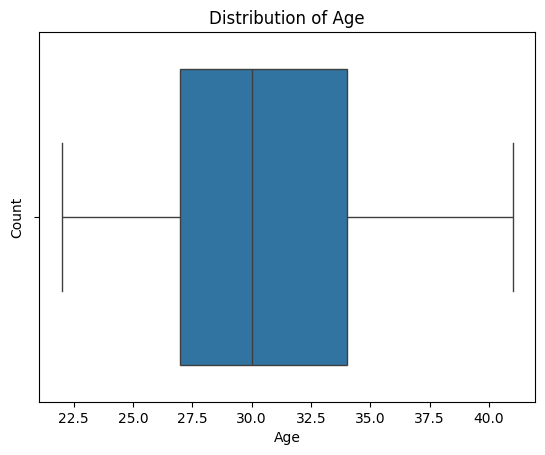

In [ ]:
sns.boxplot(x='Age', data=df)
plt.title(f'Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Categorical Univariate Analysis**

We will use `Education` as an example on how we can produce frequency counts & a simple bar chart for visualisation.

--- Education ---
Frequency Counts:
Education
Bachelors    2244
Masters       704
PHD           161
Name: count, dtype: int64

Proportions (%):
Education
Bachelors    72.177549
Masters      22.643937
PHD           5.178514
Name: proportion, dtype: float64
----------


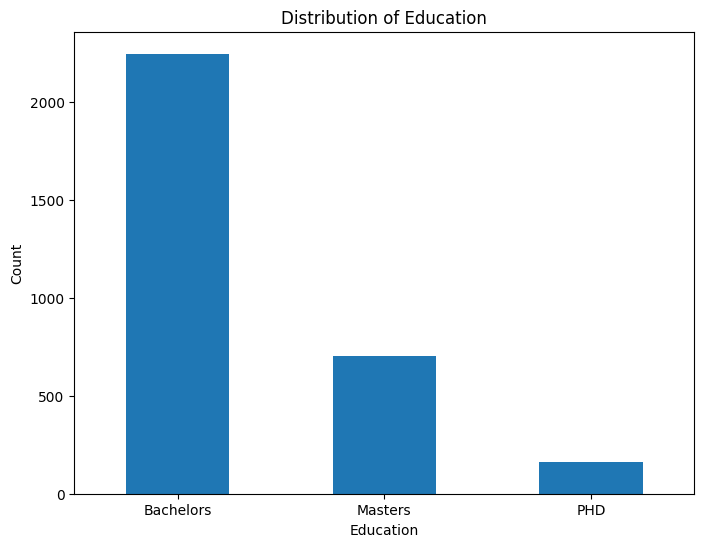

In [ ]:
# getting the frequency count (we did the same thing when checking if a variable is imbalance)
counts = df['Education'].value_counts() # counts only
proportions = df['Education'].value_counts(normalize=True) * 100 # proportions (percentages)

# formatting the output (not so impt as long as you know what is the output!)
print(f"--- {'Education'} ---")
print("Frequency Counts:")
print(counts)
print("\nProportions (%):")
print(proportions)
print("-" * 10)

# viz (bar chart)
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title(f'Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## **Bivariate Analysis**

* 2 variables
* Find out the cause and the relationship between the two variables, e.g: “Does the employee’s **experience in the domain** affect whether they leave the company or not?”

### Bivariate analysis of 2 **numerical** variables

* Scatterplot
* Linear correlation

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Linear Correlation
correlation_matrix = df[numerical_cols].corr()
print("Linear Correlation Matrix:")
display(correlation_matrix)

Linear Correlation Matrix:


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.063545,0.013449,-0.030512,0.161402
PaymentTier,-0.063545,1.000000,0.054216,-0.003672,-0.127437
Age,0.013449,0.054216,1.000000,-0.063508,-0.099596
ExperienceInCurrentDomain,-0.030512,-0.003672,-0.063508,1.000000,-0.016361
LeaveOrNot,0.161402,-0.127437,-0.099596,-0.016361,1.000000


### Bivariate analysis of **2 categorical** variables

We perform **chi-square test** for bivariate analysis of 2 categorical variables.

The aim of this chi-square test is to conclude whether the two variables are related to each other not.

**Null hypothesis:** There is no relation between ‘Gender’ and ‘Education'.

**Alternate hypothesis:** There is a significant relationship between the two variables.

In [ ]:
#!pip install scipy
#uncomment the first line when running for the first time, subsequently can comment it
from scipy.stats import chi2_contingency #import package for chi-sq

In [ ]:
# contingency table
contingency_table = pd.crosstab(df['Education'], df['Gender'])
print("Contingency Table:")
display(contingency_table)

Contingency Table:


Gender,Female,Male
Education,,
Bachelors,973,1271
Masters,295,409
PHD,64,97


In [ ]:
# chi-sq test for 'Education' and 'Gender' (2 categorical variables)

# performing chi-sq
_, p, _, _ = chi2_contingency(contingency_table)

print("\np-value:", p)

alpha = 0.05 # significance level

print("\np value is " + str(p))
if p <= alpha:
    print('\nDependent (reject H0)')
else:
    print('\nIndependent (H0 holds true)')


p-value: 0.5691690269057504

p value is 0.5691690269057504

Independent (H0 holds true)


Insights:

Tthe null hypothesis holds true => There is no relation between `Gender` and `Education`.

### Bivariate Analysis of **one numerical and one categorical variable**

We typically use T-test for the analysis (ANOVA also works but we will not be going through ANOVA for this workshop!)

#### **T Test**

*   T test is more suitable for comparing means between two groups



**Performing independent t-test** to compare the means of `Age` between employees who left and those who stayed


**Null Hypothesis (H0):** There is no significant difference in the mean of the two groups.

**Alternative Hypothesis (H1):** There is a significant difference in the mean of the two groups.

In [ ]:
from scipy.stats import ttest_ind # independent t-test

In [ ]:
left = df[df['LeaveOrNot'] == 1]
stayed = df[df['LeaveOrNot'] == 0]

# independent t-test for 'Age'
ttest_age = ttest_ind(left['Age'], stayed['Age']) # comparing the mean age of the 'left' group to the mean age of the 'stayed' group
print(f"Independent t-test p-value for Age: {ttest_age.pvalue}") #ttest_age.pvalue: extracts p-value from the t-test

# output
alpha = 0.05 # chosen significance level

if ttest_age.pvalue <= alpha:
    print('Therefore, reject H0')
else:
    print('Therefore, H0 holds true')

Independent t-test p-value for Age: 2.6224572497466047e-08
Therefore, reject H0


**Interpretation of conclusion:** The statistically significant differences found by the t-tests suggest that age is **indeed factors that are associated** with whether an employee leaves or stays in this dataset. This aligns with common intuition about employee retention.

**Age:** employees of different age groups might have varying reasons for leaving or staying at a company. For instance, younger employees might leave more frequently for new opportunities, while older employees might prioritize stability.

# **Balancing Data** (FYI)

[THIS SECTION IS FOR YOUR OWN LEARNING IF YOU WANT TO KNOW MORE]

This section of the code is on how to balance the data (after identifying imbalance) to prep for Machine Learning models. We will not be going through this portion in the workshop and it is purely for your own information.

Note that we only perform balancing on target variables (y), and NOT for input variables (X). In this example, we will perform balancing on `LeaveOrNot`

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Separate features and target
X = df.drop(columns=['LeaveOrNot'])   # input variables
y = df['LeaveOrNot']                  # target variable

## **Undersampling**

### **Random Undersampling**

*   Keeping all of the data in the minority class and **decreasing the size of the majority class**
*   Used when the amount of collected data is sufficient or when there is too much data to be easily processed

Undersampled: LeaveOrNot
0    1200
1    1200
Name: count, dtype: int64


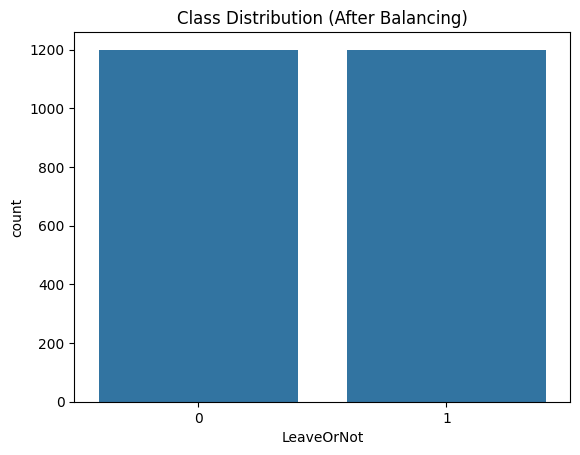

In [ ]:
rus = RandomUnderSampler(random_state=42)
#RandomUnderSample(): creates an under-sampling object
#random_state = 42: so you get the same random results each time

X_rus, y_rus = rus.fit_resample(X, y)
#fit_sample(X, y): removes extra samples from the majority class from ur data
print("Undersampled:", y_rus.value_counts())

# plotting
sns.countplot(x=y_rus) #seaborn countplot, sns.countplot(data = ___, x = ____)
plt.title("Class Distribution (After Balancing)")
plt.show()

## **Oversampling**

### Random Oversampling

*   Duplicate minority class for a more balanced number of positive results in training
*   Used when the amount of data collected is insufficient




Oversampled: LeaveOrNot
0    1909
1    1909
Name: count, dtype: int64


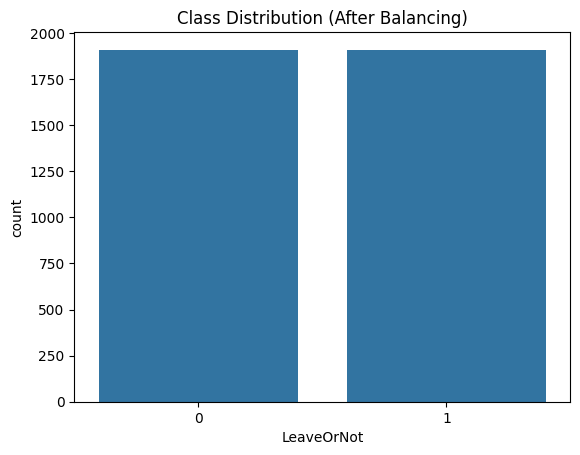

In [ ]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print("Oversampled:", y_ros.value_counts())
# note: we follow the same way as random undersampling

# plotting
sns.countplot(x=y_ros)
plt.title("Class Distribution (After Balancing)")
plt.show()